In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
mpl.rcParams['figure.figsize'] = [12,8]

### Logistic regression and regualarization

- Regularization combats overfitting by making the models coefficients smaller

- In sklearn the c and the degree of regularization are inverse, the lower the c, the higher the regularization.

- regularized loss = orginal loss + large coeffiecent penalty
    - more regularization: lower training accuracy
    - more regularization: (almost always) higher test accuracy

- If using a feature too heavily was causing overfitting, then regularization causes you to 'fit less' and thus overfit less. 

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
#X_10 = data.data[:, :10]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X = scaler.fit_transform(data.data)
y = data.target
y[y == 0] = -1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
lr_L1 = LogisticRegression(penalty='l1')
lr_L2 = LogisticRegression()

lr_L1.fit(X_train, y_train)
lr_L2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

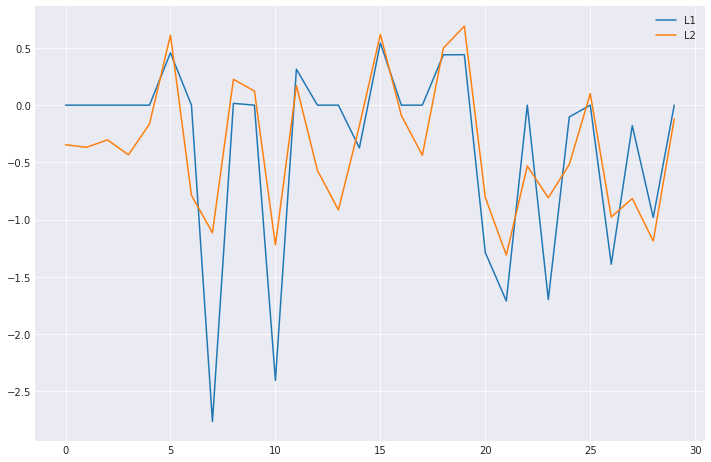

In [6]:
plt.plot(lr_L1.coef_.flatten(), label='L1')
plt.plot(lr_L2.coef_.flatten(), label='L2')
plt.legend()

In [7]:
from sklearn import datasets
digits = datasets.load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

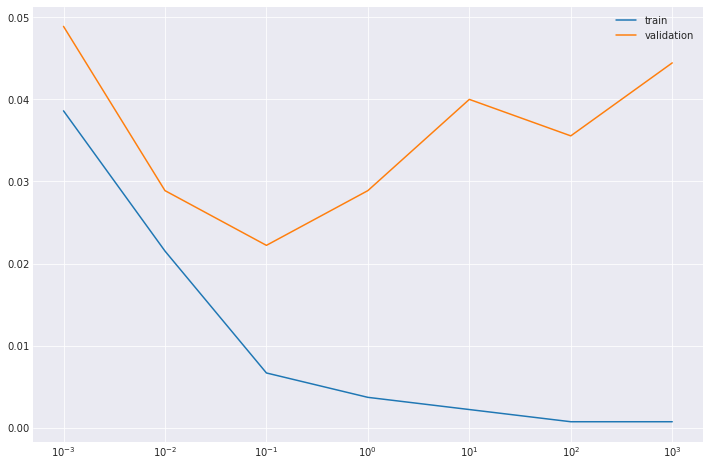

In [12]:
# Train and validation errors initialized as empty list
train_errs = list()
valid_errs = list()

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Loop over values of C_value 
for C_value in C_values:
    #Create LogisticRegression object and fit 
    lr = LogisticRegression(C=C_value)
    lr.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists 
    train_errs.append( 1.0 - lr.score(X_train, y_train))
    valid_errs.append( 1.0 - lr.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_values, train_errs, C_values, valid_errs)
plt.legend(('train', 'validation'))
plt.show()